Testing AAPL...


[*********************100%***********************]  1 of 1 completed


Performance for AAPL:
Sharpe Ratio: 0.27
Maximum Drawdown: -58.12%
Win Rate: 50.26%
Total Trades: 3223
Profitable Trades: 1620



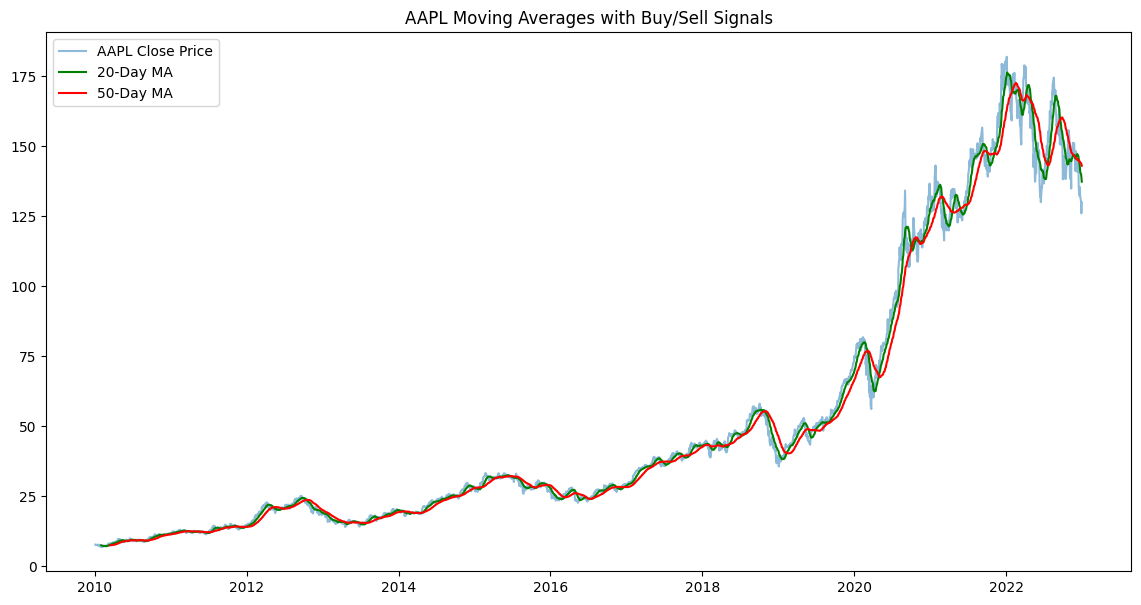

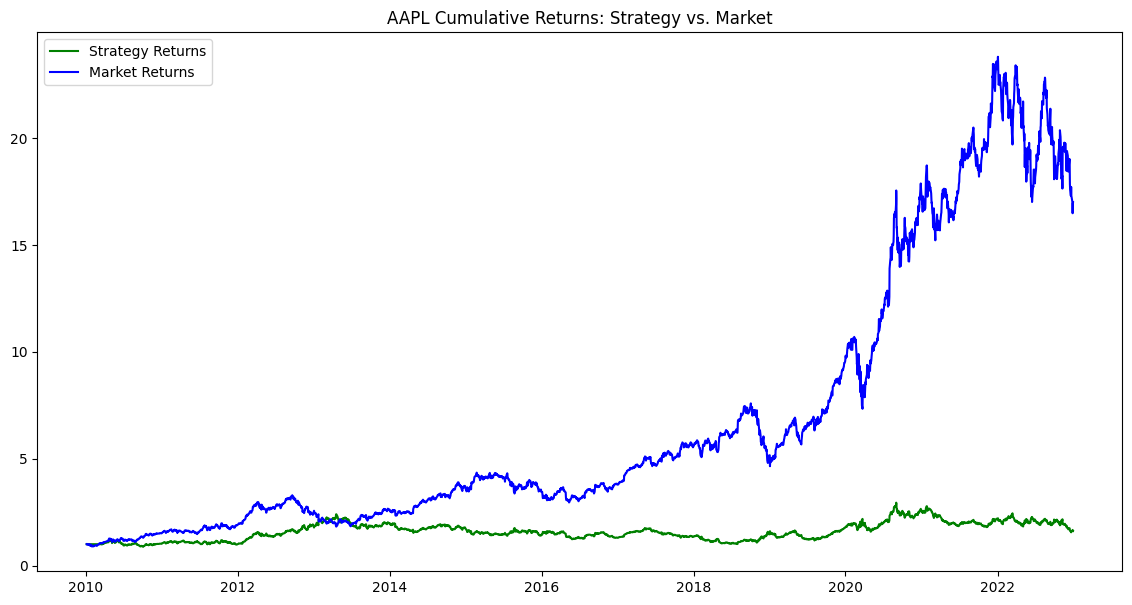

Testing GOOGL...


[*********************100%***********************]  1 of 1 completed


Performance for GOOGL:
Sharpe Ratio: 0.11
Maximum Drawdown: -50.82%
Win Rate: 50.36%
Total Trades: 3223
Profitable Trades: 1623



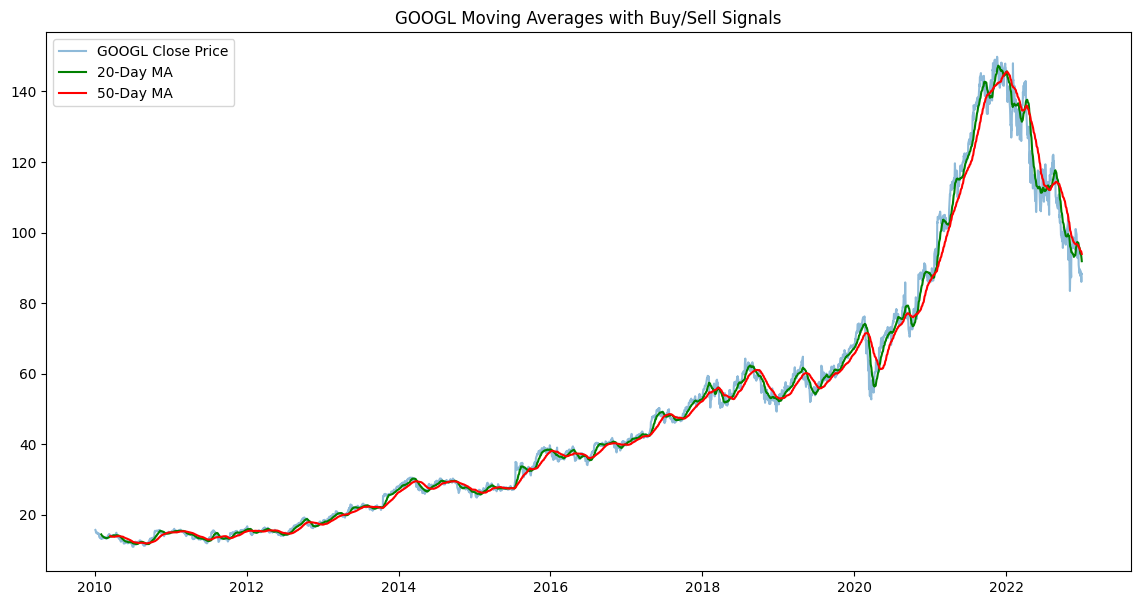

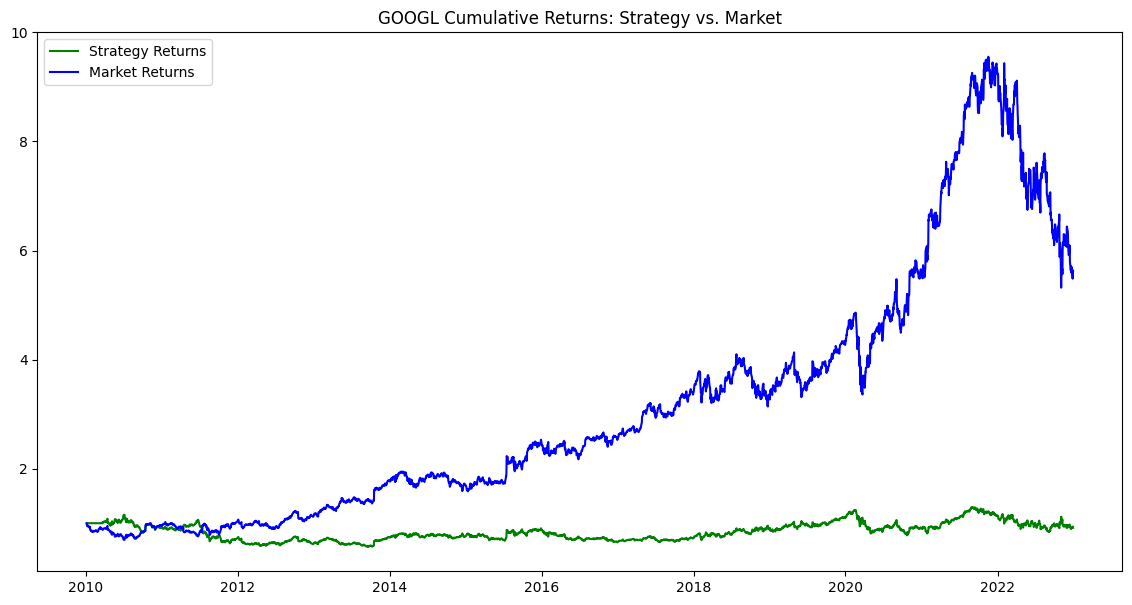

Testing EURUSD=X...


[*********************100%***********************]  1 of 1 completed


Performance for EURUSD=X:
Sharpe Ratio: 0.14
Maximum Drawdown: -27.72%
Win Rate: 49.87%
Total Trades: 3337
Profitable Trades: 1664



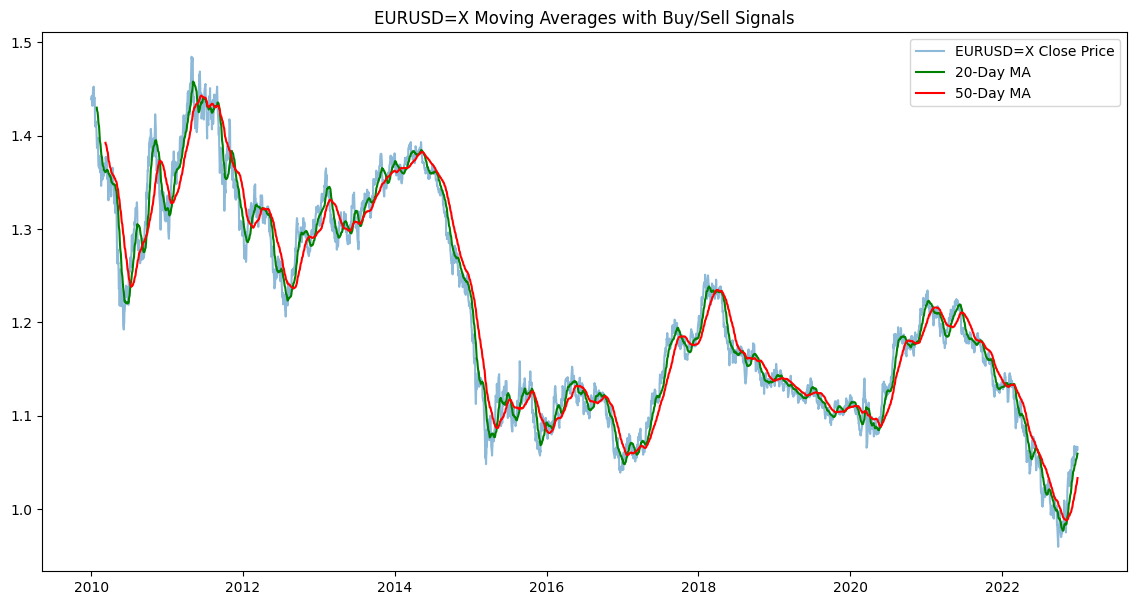

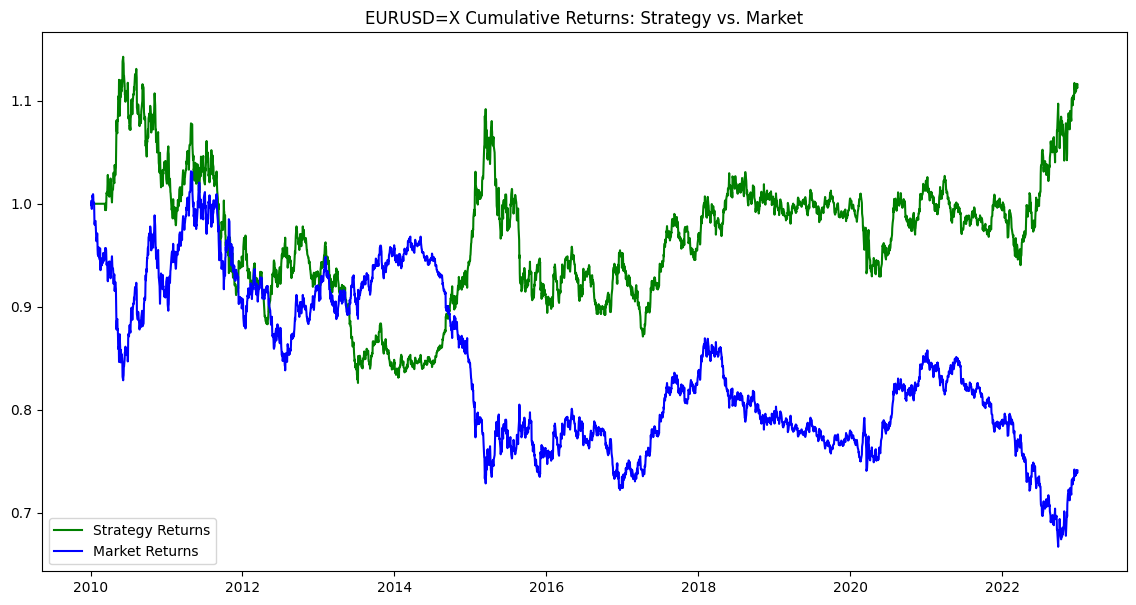

Testing ^GSPC...


[*********************100%***********************]  1 of 1 completed


Performance for ^GSPC:
Sharpe Ratio: -0.02
Maximum Drawdown: -39.45%
Win Rate: 51.44%
Total Trades: 3223
Profitable Trades: 1658



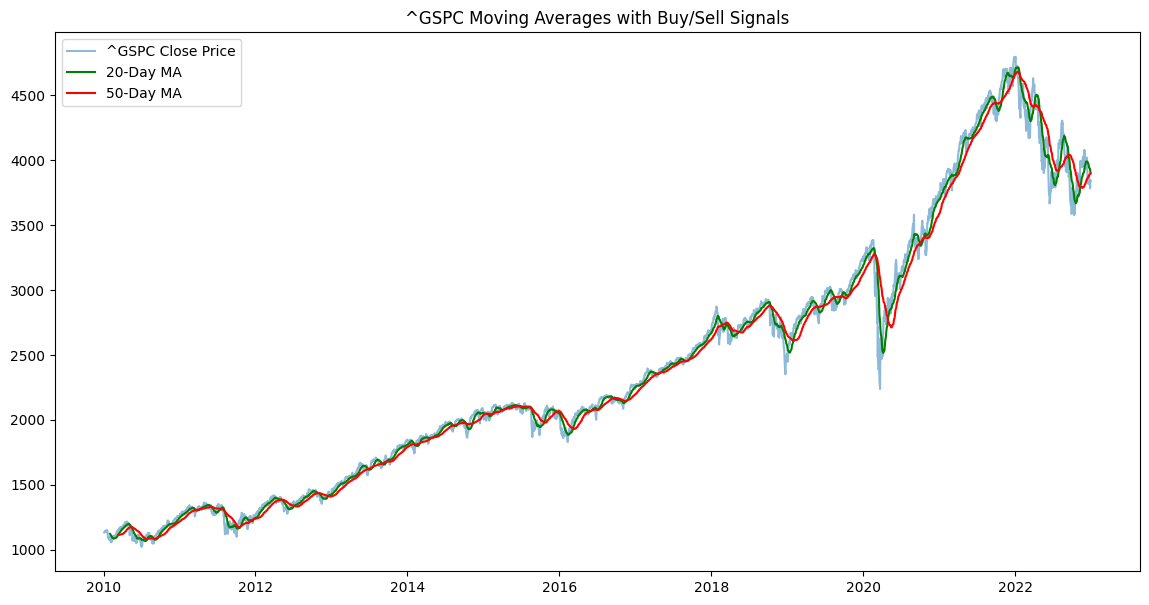

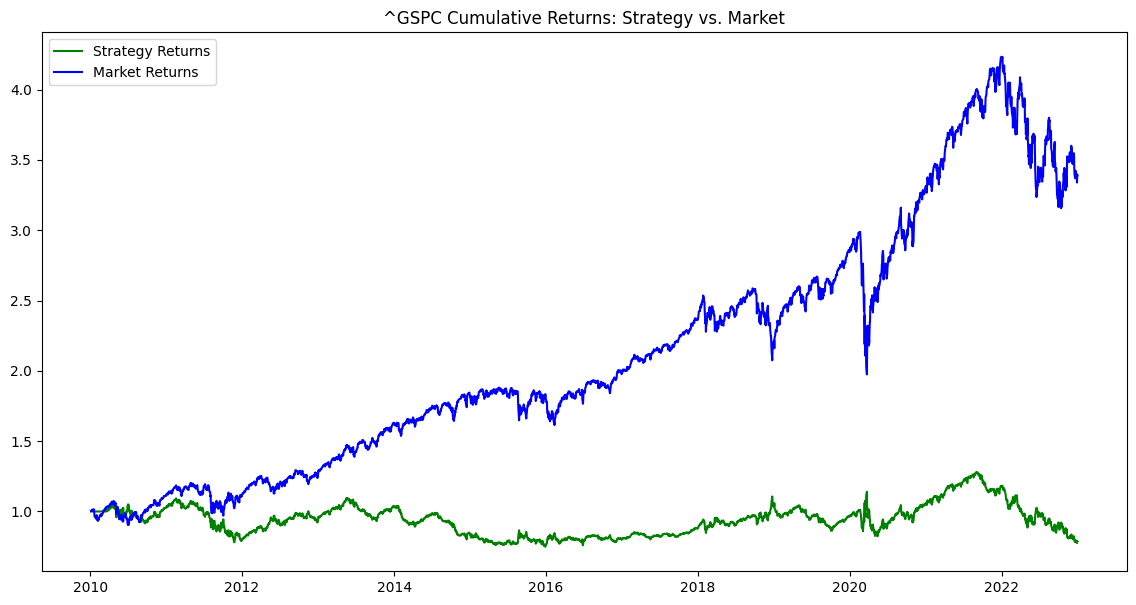

Testing TLT...


[*********************100%***********************]  1 of 1 completed


Performance for TLT:
Sharpe Ratio: 0.26
Maximum Drawdown: -33.18%
Win Rate: 50.45%
Total Trades: 3223
Profitable Trades: 1626



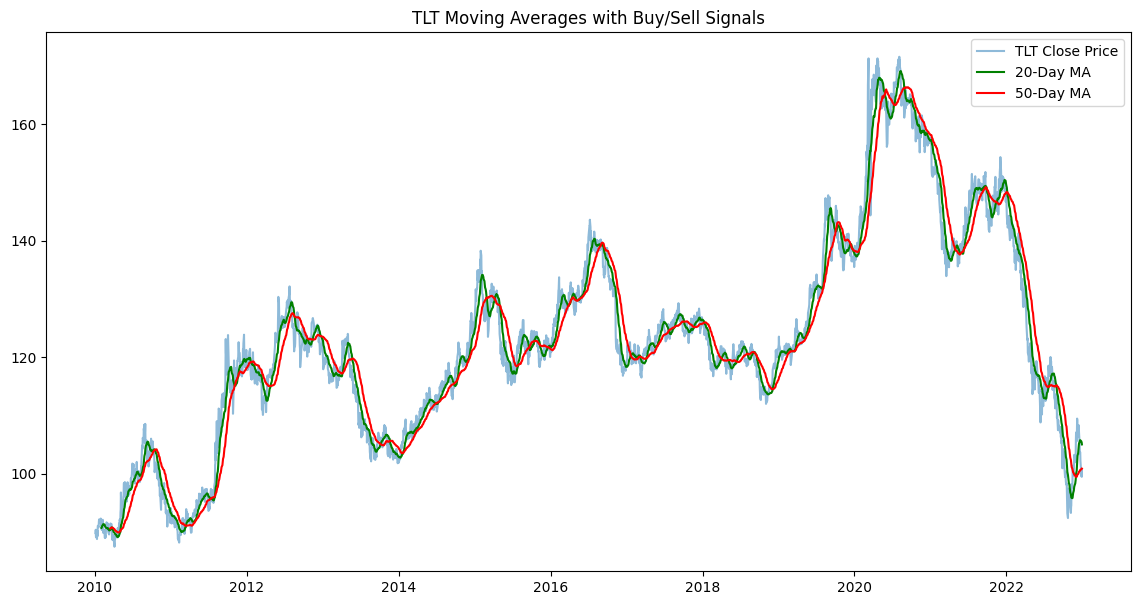

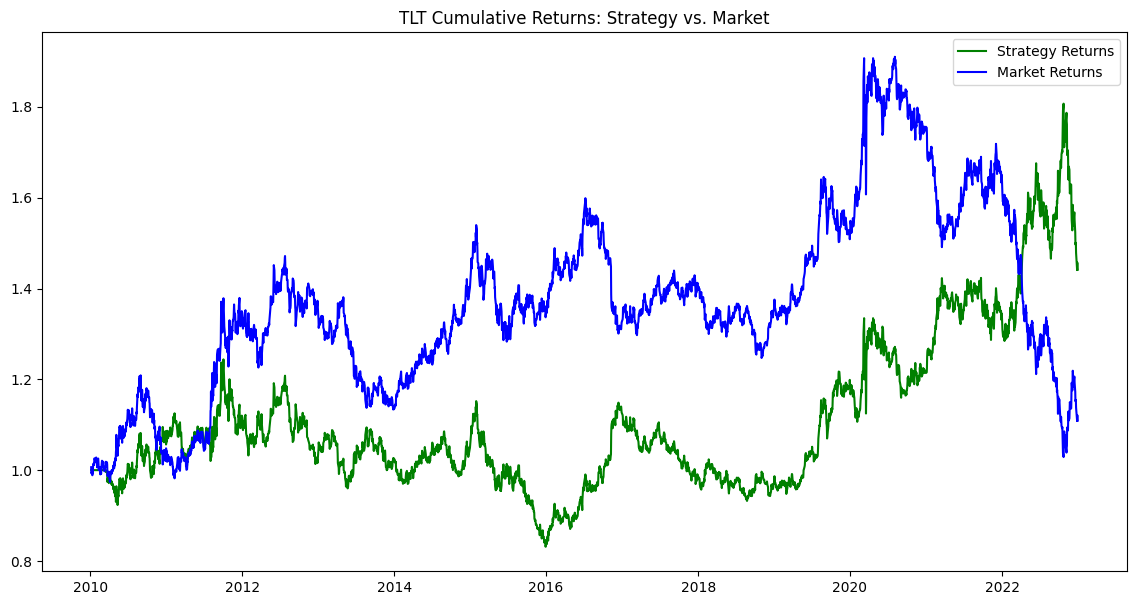

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Define function to fetch data and calculate signals
def calculate_signals(symbol, start_date="2010-01-01", end_date="2023-01-01", interval="1d"):
    # Fetch historical data
    data = yf.download(symbol, start=start_date, end=end_date, interval=interval)

    # Calculate Moving Averages
    data['Short_MA'] = data['Close'].rolling(window=20).mean()  # 20-day MA
    data['Long_MA'] = data['Close'].rolling(window=50).mean()  # 50-day MA

    # Generate Buy/Sell Signals
    data['Signal'] = 0
    data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1  # Buy signal
    data.loc[data['Short_MA'] <= data['Long_MA'], 'Signal'] = -1  # Sell signal

    # Calculate daily returns
    data['Return'] = data['Close'].pct_change()
    data['Strategy_Return'] = data['Signal'].shift(1) * data['Return']  # Strategy return

    # Calculate performance metrics
    sharpe_ratio = data['Strategy_Return'].mean() / data['Strategy_Return'].std() * (252**0.5)  # Annualized Sharpe Ratio
    data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()
    max_drawdown = (data['Cumulative_Return'] / data['Cumulative_Return'].cummax() - 1).min()

    # Win Rate
    profitable_trades = data[data['Strategy_Return'] > 0].shape[0]
    total_trades = data[data['Signal'] != 0].shape[0]
    win_rate = profitable_trades / total_trades if total_trades > 0 else 0

    # Print performance metrics
    print(f"Performance for {symbol}:")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Maximum Drawdown: {max_drawdown:.2%}")
    print(f"Win Rate: {win_rate * 100:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Profitable Trades: {profitable_trades}\n")

    return data

# Define function to plot data
def plot_signals(data, symbol):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label=f"{symbol} Close Price", alpha=0.5)
    plt.plot(data['Short_MA'], label='20-Day MA', color='green')
    plt.plot(data['Long_MA'], label='50-Day MA', color='red')
    plt.title(f"{symbol} Moving Averages with Buy/Sell Signals")
    plt.legend()
    plt.show()

    # Plot cumulative returns
    plt.figure(figsize=(14, 7))
    data['Cumulative_Strategy'] = (1 + data['Strategy_Return']).cumprod()
    data['Cumulative_Market'] = (1 + data['Return']).cumprod()
    plt.plot(data['Cumulative_Strategy'], label="Strategy Returns", color='green')
    plt.plot(data['Cumulative_Market'], label="Market Returns", color='blue')
    plt.title(f"{symbol} Cumulative Returns: Strategy vs. Market")
    plt.legend()
    plt.show()

# Define symbols to test (5 instruments across different markets)
symbols = ["AAPL", "GOOGL", "EURUSD=X", "^GSPC", "TLT"]

# Loop through each symbol and test
for symbol in symbols:
    print(f"Testing {symbol}...")
    data = calculate_signals(symbol, start_date="2010-01-01", end_date="2023-01-01", interval="1d")
    plot_signals(data, symbol)